<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/World_football_results_predicions_using_machine_learning/blob/master/Precy_Mae_Core_W6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Core W6 Independent Project**


---



## *1.* Defining the Question

**Overview**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches as showngiven the datasets that will be provided.


To work on this project, we will perform the following analysis with Python; 

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Expected flow for the assessment:
* Perform your EDA
* Perform any necessary feature engineering 
* Check of multicollinearity
* Start building the model
* Cross-validate the model
* Compute RMSE
* Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
2. Perform appropriate regressions on the data including your justification
3. Challenge your solution by providing insights on how you can make improvements.

**Dataset** 

* Variable Definitions: /content/fifa_ranking.csv
* Dataset: /content/results.csv

**Results dataset column descriptions;**

*  date - date of the match
* home_team - the name of the home team
* away_team - the name of the away team
* home_score - full-time home team score including extra time, not including penalty-shootouts
* away_score - full-time away team score including extra time, not including penalty-shootouts
* tournament - the name of the tournament
* city - the name of the city/ town/ administrative unit where the match was played
* country - the name of the country where the match was played
* neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

### a) Specifying the Question

>  Give a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).




### b) Defining the Metric for Success
 

> Getting an accurate solution to our hypothesis





### c) Understanding the context
> 

### d) Recording the Experimental Design

We took the following steps to get our hypothesis solution

>**1) Business Understanding**: This enabled us to understand the details as well as the context of our claim. In this case, the car sharing company wants to decifer some claims concerning the bluecar.


>**2) Reading the data:** This enables us to undrestand the data provided.


>**3) Checking our data:** This gives us information about our dataset including the shape, data types, columns, statistical summaries and other details about the dataset.


>**4) Data cleaning:** I enables us to come up with clean data that is easier to analyse. This involves reanming columns, checking and dealing with missing values and others .


>**5) EDA:** visualizing and understanding data.


>**6) Implementing the solution:** using hypothesis testing


>**7) Challenging the solution:**


>**8)Conclusion**















### e) Data Relevance
> The data is relevant as it is found from the FiFa website: https://www.fifa.com/fifa-world-ranking/ranking-table/men/


## *2.* Reading the Data


In [437]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [438]:
# Read rankings dataset
df_rankings= pd.read_csv("/content/fifa_ranking.csv",encoding='latin-1',error_bad_lines=False)
df_rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [439]:
# Read the results dataset
df_results= pd.read_csv("/content/results.csv",encoding='latin-1',error_bad_lines=False)
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Checking the shape of the datasets**

In [440]:
# shape of ranks
df_rankings.shape

(57793, 16)

In [441]:
# shape of results
df_results.shape

(40839, 9)

In [442]:
# missing values
df_results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

**merging our datasets**

In [443]:
# Checking for duplicates
df_rankings.duplicated().sum()

37

We will first drop our duplicates to enable our merge

In [444]:
# Dropping the duplicates
df_rankings.drop_duplicates(inplace=True)

In [445]:
# Picking the rank date column and the rank column from our rankings dataset
#df_ranking=df_rankings.loc[: ['rank','country_full','rank_date']].head()
df_ranking= df_rankings[['country_full','rank_date','rank']]
df_ranking.head()

,country_full,rank_date,rank
0,Germany,1993-08-08,1
1,Italy,1993-08-08,2
2,Switzerland,1993-08-08,3
3,Sweden,1993-08-08,4
4,Argentina,1993-08-08,5


In [446]:
# Rename the column country full to enable us to merge
df_ranking.rename(columns={'country_full':'home_team'},inplace=True)

In [447]:
# We then get the year and the month from the ranking dataset
df_ranking['year'] = pd.DatetimeIndex(df_ranking['rank_date']).year
df_ranking['month'] = pd.DatetimeIndex(df_ranking['rank_date']).month

In [448]:
# We create a year and month of match date column from the results dataset
df_results['year'] = pd.DatetimeIndex(df_results['date']).year
df_results['month'] = pd.DatetimeIndex(df_results['date']).month

Our datasets now have the year and month column to enable us to merge them at the exact dates with correct ranks represented

In [449]:
# Merging our two datasets
df= pd.merge(df_results, df_ranking, on=['month','year','home_team'])
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_date,rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19


In [450]:
# Lets rename the rank to home rank
df.rename(columns={'rank':'home_rank'},inplace=True)

As you can see from our dataset, away rank is not included.


In [451]:
# The rank we have is home rank so we will have to include away rank and away team in our ranking dataset
# First rename ranking home_team to away_ team
df_ranking.rename(columns={'home_team':'away_team','rank':'away_rank'},inplace=True)
df_ranking.head(2)

,away_team,rank_date,away_rank,year,month
0,Germany,1993-08-08,1,1993,8
1,Italy,1993-08-08,2,1993,8


As Shown above, the home team has changed to away team and away rank, to be able to properly merge, we can drop the rank date column.

In [452]:
df_ranking.drop(['rank_date'],axis=1,inplace=True)

In [453]:
# We can now merge our complete dataset
df1= pd.merge(df, df_ranking, on=['month','year','away_team'])
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_date,home_rank,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19,67
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,1993-08-08,5,67
2,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19,5
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,1993-08-08,70,5
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,AsunciÃ³n,Paraguay,False,1993,8,1993-08-08,67,5


Our dataset is complete as requested

## *3.* Check the data


In [454]:
# Determining the no. of records in our dataset
#
df1.shape

(16918, 14)

In [455]:
# A Preview of dataset columns
df1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'rank_date', 'home_rank', 'away_rank'],
      dtype='object')

In [456]:
# Previewing the top of our dataset
#
df1.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_date,home_rank,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19,67
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,1993-08-08,5,67
2,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19,5


In [457]:
# Previewing the bottom of our dataset
#
df1.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_date,home_rank,away_rank
16915,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,2018,6,2018-06-07,61,8
16916,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,2018-06-07,5,22
16917,2018-06-22,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,2018-06-07,48,22


In [458]:
# Taking a look at our statistical summaries
#
df1.describe()

,home_score,away_score,year,month,home_rank,away_rank
count,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000
mean,1.603499,1.068448,2006.493675,6.874099,76.030855,78.885093
std,1.615346,1.244975,6.801394,3.274426,50.833921,52.039983
min,0.000000,0.000000,1993.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.000000,33.000000,35.000000
50%,1.000000,1.000000,2007.000000,7.000000,70.000000,72.000000
75%,2.000000,2.000000,2012.000000,10.000000,112.000000,115.000000
max,31.000000,15.000000,2018.000000,12.000000,209.000000,209.000000


## *4.* External Source Validation

>Our dataset is correct and I have confirmed that it contains the records of data by FIFA world cup mens records shown in the link; https://www.fifa.com/fifa-world-ranking/ranking-table/men/


## *5.* Tidying the Dataset


Tidying column names

In [459]:
# Data cleaning procedures, fixing column names to lower case
#
df1.columns= df1.columns.str.strip().str.lower().str.replace(' ','_')
df1.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_date,home_rank,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19,67
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,1993-08-08,5,67


In [460]:
# Review column names to ensure proper naming
df1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'rank_date', 'home_rank', 'away_rank'],
      dtype='object')

In [461]:
# checking column data types
df1.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
year           int64
month          int64
rank_date     object
home_rank      int64
away_rank      int64
dtype: object

We will have to change the data types of objects to categorical

In [462]:
# Changing the column datatypes (object) of the data we'll be using into category
df1['tounament'] = df1.tournament.astype('category')
df1['home_team'] = df1.home_team.astype('category')
df1['away_team'] = df1.away_team.astype('category')
df1.dtypes

date            object
home_team     category
away_team     category
home_score       int64
away_score       int64
tournament      object
city            object
country         object
neutral           bool
year             int64
month            int64
rank_date       object
home_rank        int64
away_rank        int64
tounament     category
dtype: object

Dealing with missing values

In [463]:
# Identifying the Missing Data
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
month         0
rank_date     0
home_rank     0
dtype: int64

We have no missing values

Checking for consistency and Uniformity

In [464]:
# Checking for unique values per column. To check for any anomalies
for column in df1.columns:
  print('\n')
  print(df1[column].nunique())
  print(df1[column].unique())



4469
['1993-08-01' '1993-08-29' '1993-08-15' ... '2018-06-14' '2018-06-15'
 '2018-06-12']


193
[Colombia, Argentina, Peru, Paraguay, Uruguay, ..., Chinese Taipei, CuraÃ§ao, South Sudan, Gibraltar, Kosovo]
Length: 193
Categories (193, object): [Colombia, Argentina, Peru, Paraguay, ..., CuraÃ§ao, South Sudan, Gibraltar,
                           Kosovo]


193
[Paraguay, Argentina, Peru, Colombia, Ecuador, ..., New Caledonia, CuraÃ§ao, South Sudan, Gibraltar, Kosovo]
Length: 193
Categories (193, object): [Paraguay, Argentina, Peru, Colombia, ..., CuraÃ§ao, South Sudan, Gibraltar,
                           Kosovo]


21
[ 0  2  1  4  7  5  3  6  8 10  9 12 13 14 16 19 11 17 31 22 15]


14
[ 0  1  3  5  7  2  4  8  9  6 12 10 15 13]


65
['FIFA World Cup qualification' 'Friendly'
 'African Cup of Nations qualification' 'AmÃ\xadlcar Cabral Cup'
 'United Arab Emirates Friendship Tournament'
 'Malta International Tournament' 'CFU Caribbean Cup qualification'
 'African Cup of Nations' 'CFU 

From my observation, the tournament column has 104 possibilities

Creating a new column for wins, draws and losses.

In [465]:
# First create a new column that takes our scores so that we are able to figure if it's a win(>=1) or a loss (<0), draw(0)
df1['score']= df1['home_score']-df1['away_score']

In [466]:
# Create a for loop to feed into a new column called results
outcome = [] 
# For each row in the column 
for score in df1['score']:        
    if score >= 1:                   # if home score is greater than away score
        outcome.append('win') 
    elif score < 0:                  # if away score is greater than home score
        outcome.append("lose") 
    else: 
        outcome.append("draw") 
  
# Create a column from the list 
df1['home_results'] = outcome 
df1.head(3)                             	

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_date,home_rank,away_rank,tounament,score,home_results
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19,67,FIFA World Cup qualification,0,draw
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,1993-08-08,5,67,FIFA World Cup qualification,0,draw
2,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1993-08-08,19,5,FIFA World Cup qualification,1,win


The new column called home results contains information on whether the home team won, lost or got a draw.

In [467]:
# We can now drop the column score
df1.drop(['score'],axis=1,inplace=True)

Checking for outliers

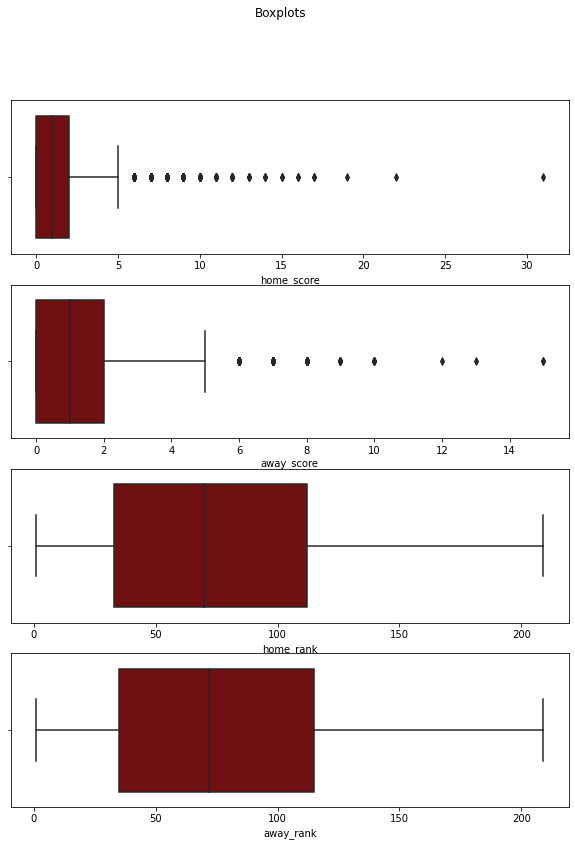

In [468]:
# Checking for outliers
fig, ((ax1),(ax2), (ax3),(ax4)) = plt.subplots(4 ,figsize=(10, 13))
fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df1['home_score'], ax=ax1, color='maroon')
sns.boxplot(df1['away_score'], ax=ax2, color='maroon')
sns.boxplot(df1['home_rank'], ax=ax3, color='maroon')
sns.boxplot(df1['away_rank'], ax=ax4, color='maroon')


plt.show()

There are scores that are way beyond 20 for home score and 30 for away score, which appears not to be normal to get such high scores. I will therefore remove the outliers.

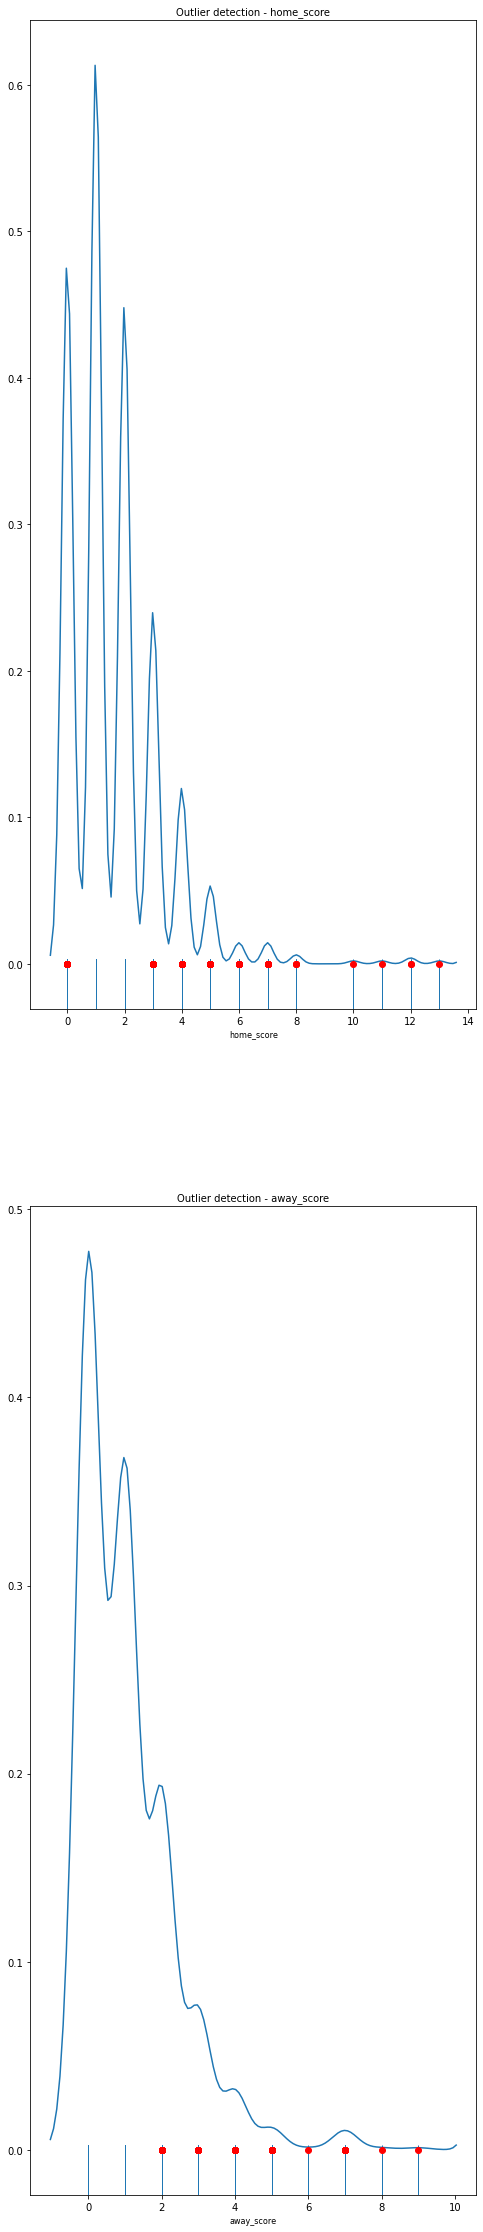

In [469]:
#  Removing outliers using percentile based outlier removal giving a threshold of 20
def percentile_based_outlier(df1, threshold=20):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(df1, [diff, 100 - diff])
    return (df1 < minval) | (df1 > maxval)

col_names = ['home_score','away_score']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df [col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()
# The values marked with a dot below in the x-axis of the graph have been removed from the column based on the set threshold percentile.

We have successfully removed our outliers

## *6.* Exploratory Analysis




### Univariate analysis

**Measures of central tendancy**

In [470]:
# Creating a list with my column names to make it easier to create a for loop
all_columns= list(df1.columns)
all_columns.remove('home_team')
all_columns.remove('away_team')
all_columns.remove('tournament')
all_columns.remove('tounament')
all_columns.remove('date')
all_columns.remove('city')
all_columns.remove('home_results')
all_columns.remove('country')
all_columns.remove('neutral')
all_columns.remove('year')
all_columns.remove('month')
all_columns.remove('rank_date')



#
columns= list(df1.columns)
columns.remove('home_score')	
columns.remove('away_score')
columns.remove('home_rank') 
columns.remove('away_rank') 


In [471]:
df1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'rank_date', 'home_rank', 'away_rank', 'tounament', 'home_results'],
      dtype='object')

We have separated the numerical from the categorical columns to ease performing our Exploratory analysis.

In [472]:
# Getting the mean
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df1[column].mean()))
  



home_score:1.6034992315876582


away_score:1.0684478070693935


home_rank:76.03085471095874


away_rank:78.88509280056745


The averages(sum of total divide by number of entries) is 76.03 for home rank, 78.885 for away rank and 1.60 for home score and 1.06 for away score.

In [473]:
#Getting the median
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df1[column].median()))



home_score:1.0


away_score:1.0


home_rank:70.0


away_rank:72.0


The center most character in home rank is 70, home_score is 1  away score is 1 and away rank is also 1.

In [474]:
# Getting the mode
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df1[column].mode()))



home_score:0    1
dtype: int64


away_score:0    0
dtype: int64


home_rank:0    5
dtype: int64


away_rank:0    1
dtype: int64


* The most frequently occuring number in rank is rank number two. 
* While the most frequently occuring home score is 1 this could mean that most home players score a 1. 
* The most frequent away score is zero, meaning most visiting teams score a zero.

In [475]:
# Getting the standard deviation
for column in all_columns:
  print('\n')
  print(column+ ':'+ str(df1[column].std()))



home_score:1.615346409751321


away_score:1.2449754175225636


home_rank:50.83392056182147


away_rank:52.03998343474385


Standard deviation means a variance from the mean. From our values;
* The SD for home rank and away rank is 50.89, 52.03 respectrively which is a high SD. This means that there is a large difference in values from the mean value.
* The SD for home_score is 1.73 which is not too large nor too small. This means that most values surround the mean value
* The SD for away score is also not so high (1.38)

In [476]:
# Getting the range of each numerical column
#
def calculating_range(column):
  maximum= df1[column].max()
  minimum=df1[column].min()
  column_range= maximum-minimum
  return column_range

for column in all_columns:
  print('\n')
  print(column+ ':'+ str(calculating_range(column)))



home_score:31


away_score:15


home_rank:208


away_rank:208


Range means distance between the highest and the lowest variable. For our variables;
* home rank and away rank is 208, the data is largely distributed.
* Home score is 31, the data is fairly distributed.
* Away score is 21, the data is fairly distributed.

In [477]:
# Interquartile range
for column in all_columns:
  print('\n')
  print(df1[column].quantile([0.25,0.5,0.75]))



0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64


0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


0.25     33.0
0.50     70.0
0.75    112.0
Name: home_rank, dtype: float64


0.25     35.0
0.50     72.0
0.75    115.0
Name: away_rank, dtype: float64


* The first quartile(0.25); is the median of the lower half of the data set this means that about 25% of the numbers in the data set lie below (25-rank), (1-home score) and (0-away score)
* Second quartile(0.50) ; the middle part of the dataset. 
* Third quartile (0.75);is the median of the upper half of the data set.
ranges are listed above this means that aout 25% of the numbers lie above (112-home rank),(115-away rank) ,(2-home score) and (2-away score)

In [478]:
# Getting the Skewness and Kurtosis
for column in all_columns:
  print('\n')
  print(column+ ', Skewness: '+str(df1[column].skew()))
  print(column+ ', Kurtosis: '+str(df1[column].kurt()))



home_score, Skewness: 2.3244564775459584
home_score, Kurtosis: 15.247160628124611


away_score, Skewness: 1.9280549163452845
away_score, Kurtosis: 7.164492375335959


home_rank, Skewness: 0.4475146957161348
home_rank, Kurtosis: -0.6875680175102317


away_rank, Skewness: 0.4468430525812443
away_rank, Kurtosis: -0.7090374322163808


*Skewness is a measure of a dataset’s symmetry.A perfectly symmetrical data set will have a skewness of 0.* From our dataset, 

* ranks seems to almost have a symetrical as it is closest to zero (0.447) but both home score and away score are positively skewed, meaning most numbers lie to the right of the x axis.

*“The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution.”- Dr Wheeler*.  From our dataset;

* Rank has a kurtosis closer to zero, meaning it's tail is fairly distributed to the rest of the dataset.
Home score and away score both have  positive Kursosis meaning they have a larger tail compared to the rest of the dataset.

We will visualize this using the histograms below.





**Histograms**

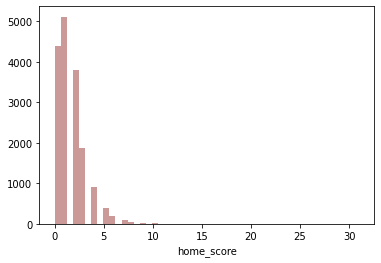

In [479]:
# Plotting a histogram for away score
sns.distplot(df1['home_score'], kde = False, color = 'maroon')

As shown above, the histogram of home score shows that the values are more to the right of the x axis  and there are many numbers as well on the bottom part causing a peak.

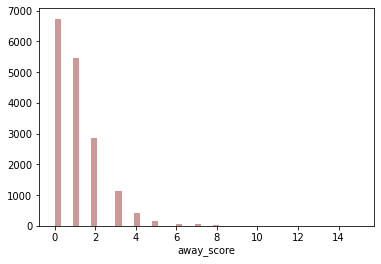

In [480]:
# Plotting a histogram for away score
sns.distplot(df1['away_score'], kde = False, color = 'maroon')
# The histogram shows that our data is skewed to the right implying that most data falls to the right, or positive side, of the graph's peak. and highly peaked.

As shown above, the histogram of away score shows that the values are more to the right of the x axis and there are many numbers as well on the bottom part causing a peak

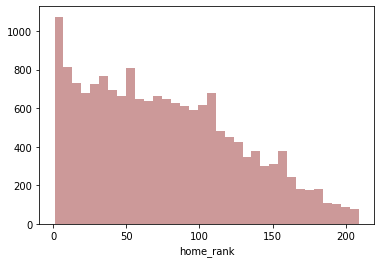

In [481]:
# Plotting a histogram for home rank
sns.distplot(df1['home_rank'], kde = False, color = 'maroon')

The histogram above shows that our home rank data is fairly distributed and it seams thet the highly ranked (top ten)teams participated more than the lowly ranked(200's)

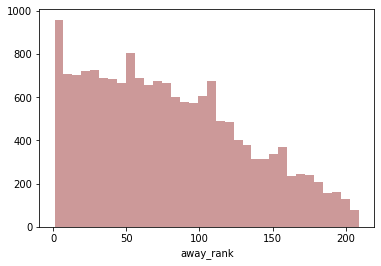

In [482]:
# Plotting a histogram for away rank
sns.distplot(df1['away_rank'], kde = False, color = 'maroon')

The distribution is quite similar to that of home rank

**Distribution plot**

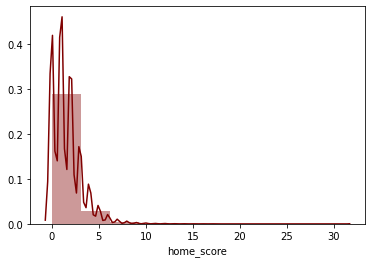

In [483]:
# A plot showing both a line and histogram graph for home score
sns.distplot(df1['home_score'],color='maroon', bins=10)

The distribution between scores is very low.

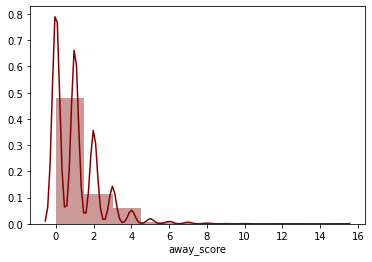

In [484]:
# A plot showing both a line and histogram graph for away score
sns.distplot(df1['away_score'],color='maroon',bins=10)

The distribution between scores is very low.

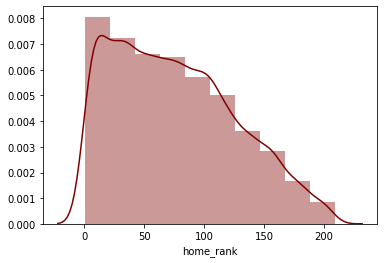

In [485]:
# A plot showing both a line and histogram graph for home rank
sns.distplot(df1['home_rank'],color='maroon',bins=10)

**Bar graphs**

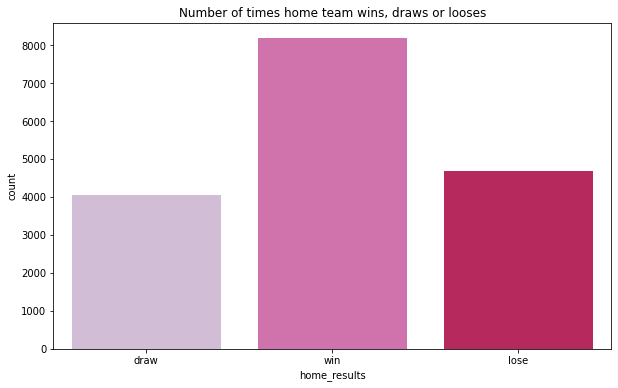

In [486]:
# Getting the frequency of the bluecars both in the weekend and weekday
import matplotlib.colors as mcolors
plt.figure(figsize=(10,6))
sns.countplot(df1['home_results'], palette='PuRd' )
plt.title('Number of times home team wins, draws or looses')
plt.show()


Wins have the highest count followed by losses then draws. This could mean that If a home team plays it wins more times than it loses or draws.

In [487]:
# To show top ten active countries in football records
country_count=df1['country'].value_counts()[:10]

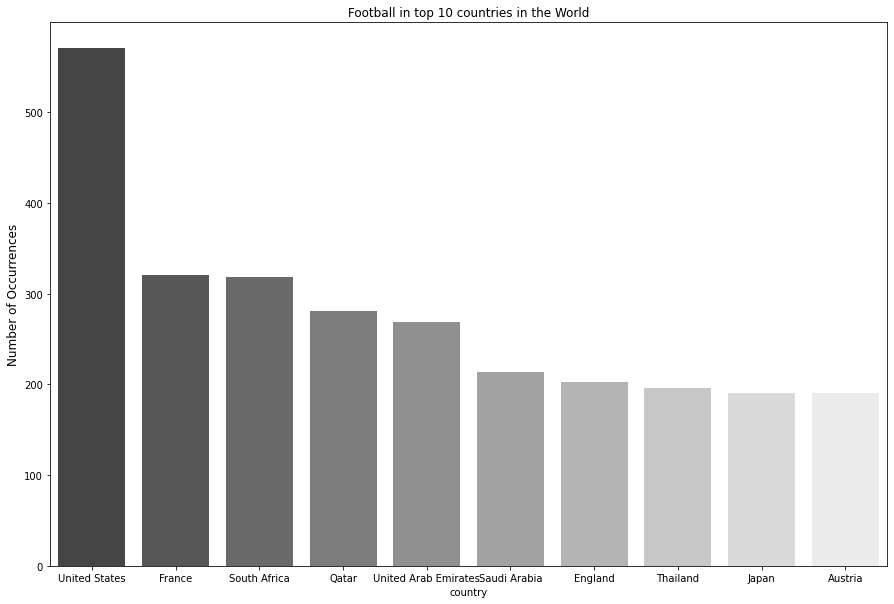

In [488]:
plt.figure(figsize=(15,10))
sns.barplot(country_count.index, country_count.values, palette='binary_r',alpha=0.8)
plt.title('Football in top 10 countries in the World')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('country', fontsize=10)
plt.show()

The most active country that hosts football matches is USA and France

In [489]:
# To show top ten active cities in hosting football matches records
city_count=df1['city'].value_counts()[:5]
city_count

Doha           254
Muscat         176
Bangkok        160
Kuwait City    148
London         142
Name: city, dtype: int64

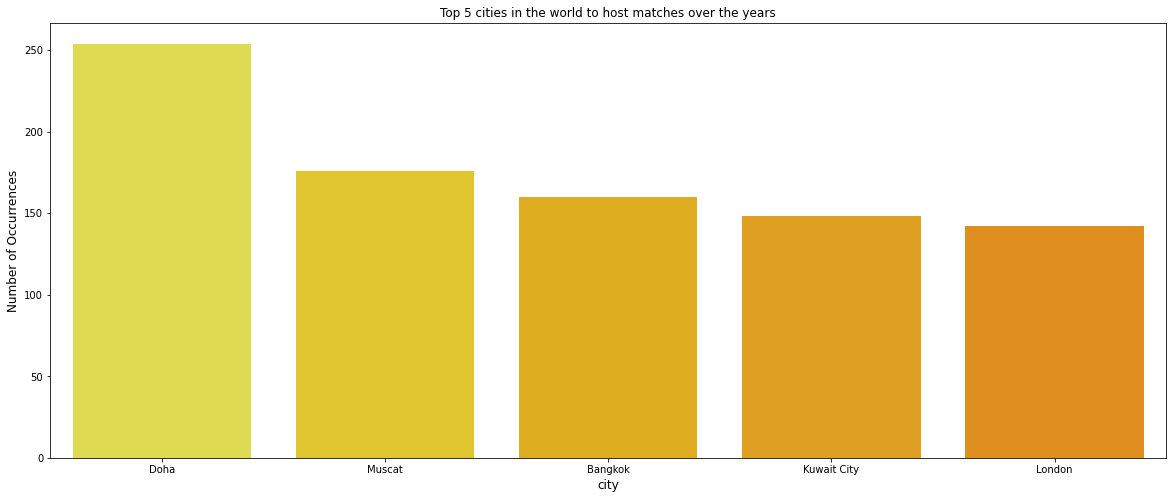

In [490]:
# To show top 5 tounaments in football
plt.figure(figsize=(20,8))
sns.barplot(city_count.index, city_count.values, palette='Wistia')
plt.title('Top 5 cities in the world to host matches over the years')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12, )
plt.show()

The most frequent city to host matches in the world is Doha

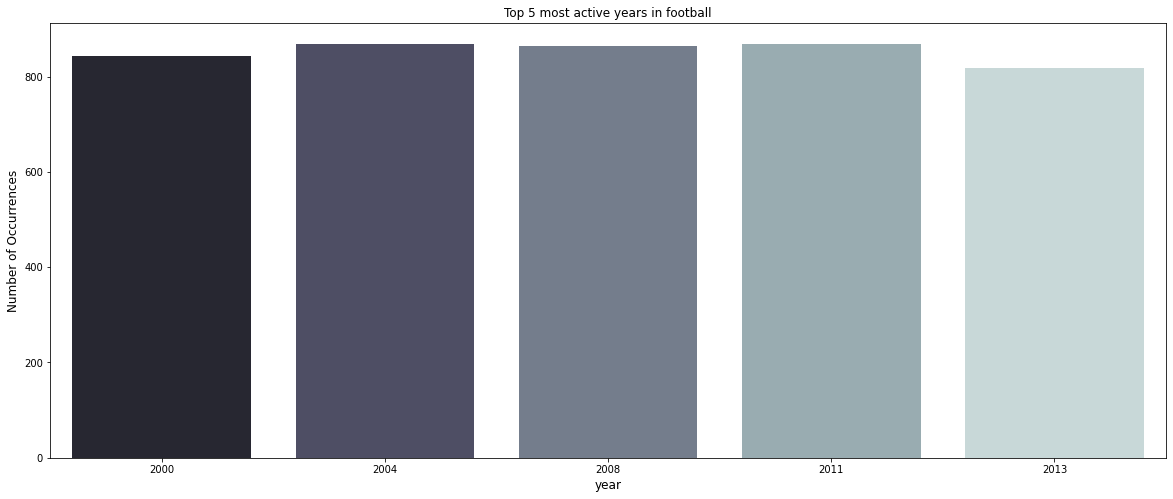

In [491]:
# To show top 5 most active year in football
year_count=df1['year'].value_counts()[:5]
plt.figure(figsize=(20,8))
sns.barplot(year_count.index, year_count.values, palette='bone')
plt.title('Top 5 most active years in football')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('year', fontsize=12, )
plt.show()

The most active years in football is 2004,2006 and 2011

In [492]:
# To show top 5 most active month in football
month_count=df1['month'].value_counts()[:5]
month_count

6     2424
10    2113
9     2044
11    1827
3     1791
Name: month, dtype: int64

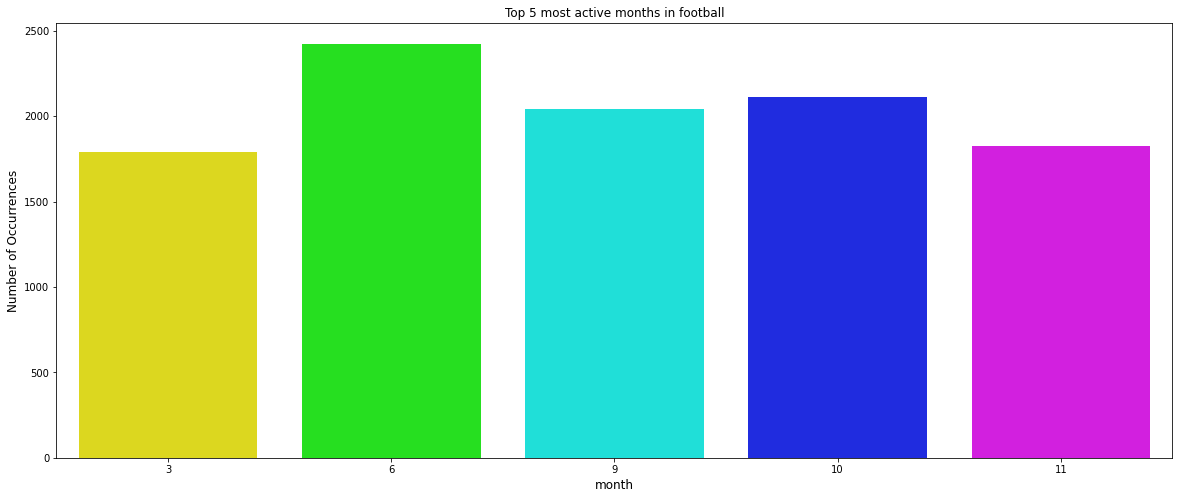

In [493]:
# To show top 5 most active month in football
#
plt.figure(figsize=(20,8))
sns.barplot(month_count.index, month_count.values, palette='hsv')
plt.title('Top 5 most active months in football')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('month', fontsize=12, )
plt.show()

The most active month in football is June

### Bivariate analysis

In [494]:
# Showing correlation using a correlation table
df1.corr()

,home_score,away_score,neutral,year,month,home_rank,away_rank
home_score,1.000000,-0.163511,-0.041964,-0.038876,0.018926,-0.134957,0.318973
away_score,-0.163511,1.000000,0.100566,-0.007844,0.017847,0.221346,-0.180216
neutral,-0.041964,0.100566,1.000000,0.043249,-0.104834,0.036853,0.047078
year,-0.038876,-0.007844,0.043249,1.000000,-0.002130,0.104121,0.105293
month,0.018926,0.017847,-0.104834,-0.002130,1.000000,0.029029,0.030256
home_rank,-0.134957,0.221346,0.036853,0.104121,0.029029,1.000000,0.469861
away_rank,0.318973,-0.180216,0.047078,0.105293,0.030256,0.469861,1.000000


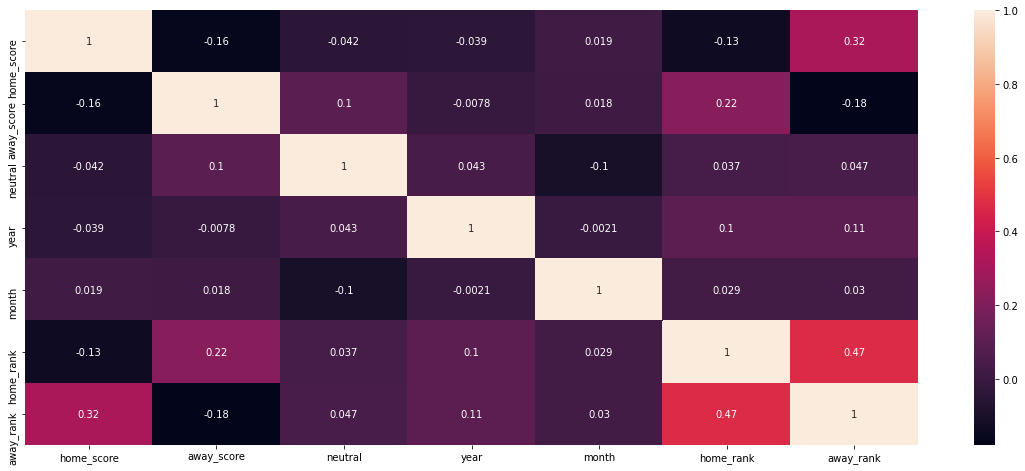

In [495]:
# Showing correlation using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

* There is a low positive relationship between home rank and away rank.
* There is a low negative relation between away rank and away score.

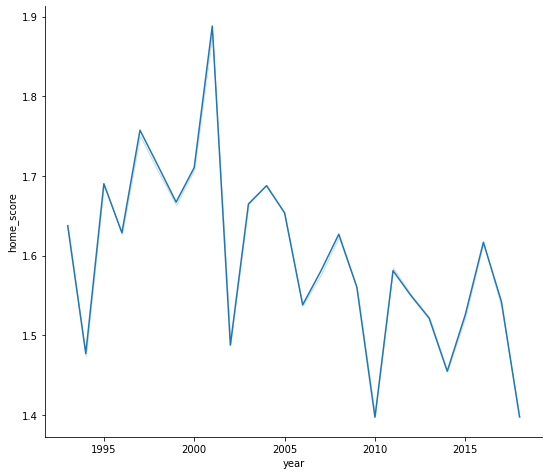

In [496]:
# Show how home scores have been performing over the years
g=sns.relplot(x='year',y='home_score',data=df1, kind='line', sort= True,ci=False)
g.fig.set_figwidth(8.27)
g.fig.set_figheight(7)

The home score values have been dropping since 2015

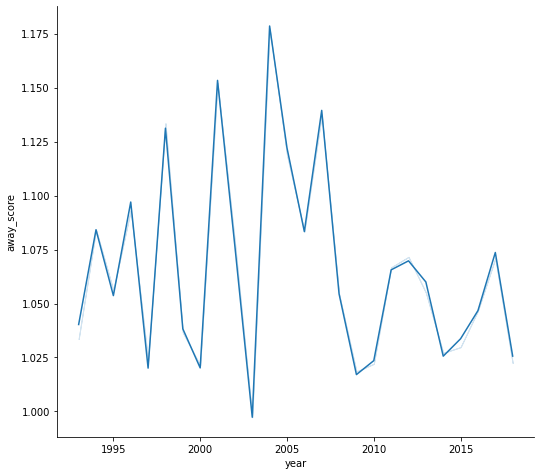

In [497]:
# Show how away scores have been performing over the years
h=sns.relplot(x='year',y='away_score',data=df1, kind='line', sort= True,ci=False)
h.fig.set_figwidth(8.27)
h.fig.set_figheight(7)

Away scores experienced a substancial drop between 2005 and 2010

## **Machine Learning**



In [498]:
# Get columns we will be using
df2= df1[['home_team','away_team','home_rank','away_rank','home_score','away_score','tournament','home_results','year']]
df2.head(2)

,home_team,away_team,home_rank,away_rank,home_score,away_score,tournament,home_results,year
0,Colombia,Paraguay,19,67,0,0,FIFA World Cup qualification,draw,1993
1,Argentina,Paraguay,5,67,0,0,FIFA World Cup qualification,draw,1993


In [499]:
# Testing for multicollinearity
# First test the correlations
correlations = df2.corr()
correlations

,home_rank,away_rank,home_score,away_score,year
home_rank,1.000000,0.469861,-0.134957,0.221346,0.104121
away_rank,0.469861,1.000000,0.318973,-0.180216,0.105293
home_score,-0.134957,0.318973,1.000000,-0.163511,-0.038876
away_score,0.221346,-0.180216,-0.163511,1.000000,-0.007844
year,0.104121,0.105293,-0.038876,-0.007844,1.000000


In [500]:
# Check the VIF score of each variable diagonally
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_rank,away_rank,home_score,away_score,year
home_rank,1.638699,-0.995566,0.460302,-0.467277,-0.051568
away_rank,-0.995566,1.756958,-0.627872,0.433531,-0.102344
home_score,0.460302,-0.627872,1.263721,-0.007879,0.067249
away_score,-0.467277,0.433531,-0.007879,1.180365,0.011959
year,-0.051568,-0.102344,0.067249,0.011959,1.018854


There is no multicollinearity because the highest VIF is 1.7466 whuch is waay below the indicator of multicollinearity which is VIF=5

### Polynomial regression
Predict how many goals the home team scores

In [501]:
df3= df2[['home_rank', 'away_rank','home_score']]
df3.head()

,home_rank,away_rank,home_score
0,19,67,0
1,5,67,0
2,19,5,2
3,70,5,0
4,67,5,1


In [502]:
# selecting x and y
x=df3.iloc[:,:-1].values
y=df3.iloc[:,2].values

In [503]:
# Import train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [504]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [505]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
x_polynomial = poly.fit_transform(x) 
  
poly.fit(x_polynomial, y) 
lin2 = LinearRegression() 
lin2.fit(x_polynomial, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [506]:
# Predict using linear regression
lin_pred = lin.predict(x_test)

# Predict using Polynomial Regression
lin2_pred=lin2.predict(x_polynomial)
lin2_pred

array([2.09531397, 2.47508331, 1.09266287, ..., 0.80917288, 1.67089603,
       1.08733735])

In [ ]:
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lin2_pred)))

### Logistic regression
Predict whether the game is a win, lose or draw

In [350]:
df4= df2[['home_team', 'away_team','home_score','away_score','year','home_results']]
df4.head()

,home_team,away_team,home_score,away_score,year,home_results
0,Colombia,Paraguay,0,0,1993,draw
1,Argentina,Paraguay,0,0,1993,draw
2,Colombia,Argentina,2,1,1993,win
3,Peru,Argentina,0,1,1993,lose
4,Paraguay,Argentina,1,3,1993,lose


In [428]:
# selecting x and y
X=df4.iloc[:,:-1].values
Y=df4.iloc[:,5].values

In [508]:
# Import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [509]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

ValueError: ignored

**Conclusion**

* We will reject the null hypothesis and favour of the alternative hypothesis.
* The difference between the number of blue cars taken on
weekdays from area code 75011 and area 75015 is statistically significant with a p-value of 0.05 and below my alpha of 0.025.
* Therefore, we conclude that our study supports the alternative hypothesis that there is a difference 
between the number of blue cars taken on weekdays from area code 75011 and area 75015.

## *9.*Follow up Questions

### a). Did we have the right data?

> Our data was right and complete we had the variables needed to explain the hypothesis for the year 2018



### b). Do we need other data to answer our question?

> Extra data would have been useful especially data on other years before 2018 because other external factors could have influenced our hypothesis result such as economic state of the people of Paris.

###c). Did we have the right question?

> The research question is right and answerable statistically

In [ ]:
df_results['tournament']=np.where(df_results['tournament']==1,'friendly','championship')

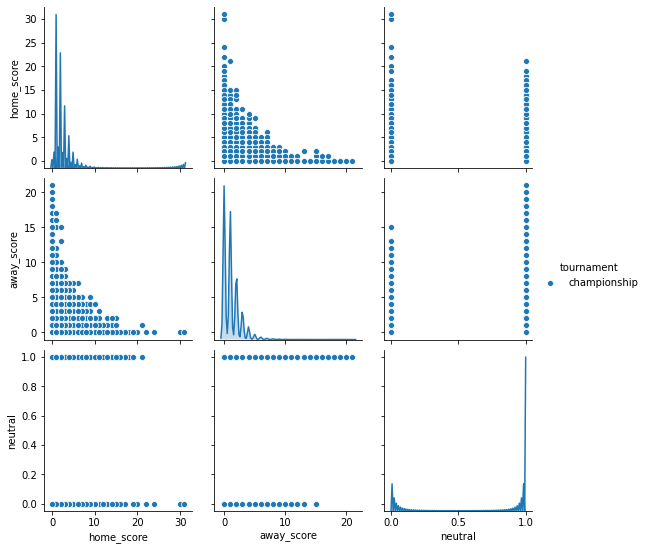

In [ ]:
sns.pairplot(df_results, hue='tournament')